In [41]:
%pip install matplotlib seaborn pandas

Note: you may need to restart the kernel to use updated packages.


In [98]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

plt.xkcd()
sns.set_context('poster')

In [99]:
versions = ['3.5', '3.6', '3.7', '3.8', '3.9', '3.10', '3.11']
# versions = [3.7, 3.8, 3.9, 3.10, 3.11]
# times = [1.3913, 1.3702, 1.3464, 1.0841, 0.9012]  # 1M
times = [13.5451, 13.2887, 13.4856, 13.9187, 12.9943, 11.0564, 8.7106]
df = pd.DataFrame({'Python version': versions, 'Loop time': times})

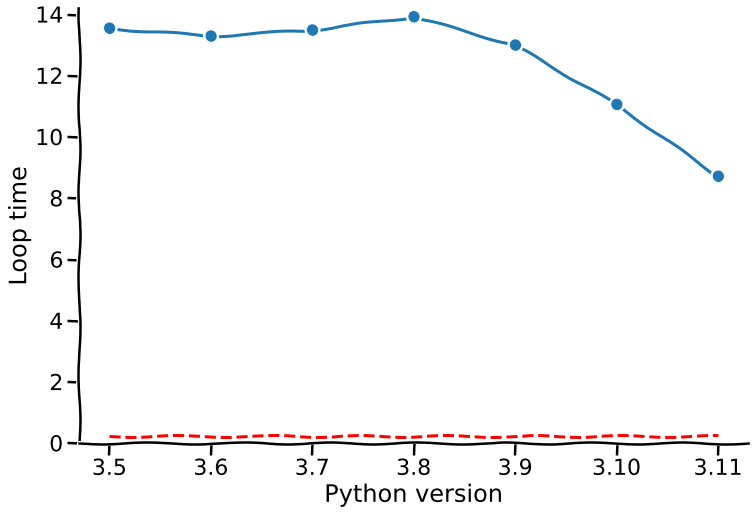

In [100]:
fig, ax = plt.subplots(figsize=(12,8))
sns.lineplot(data=df, x='Python version', y='Loop time', marker="o", ax=ax)
sns.despine()
ax.set_ylim([0,14.2])
# ax.set_xlim([3.7, 3.11])
ax.plot(['3.5', '3.11'], [0.2319, 0.2319], 'r--')

In [101]:
df['major_version'] = df['Python version'].str.split('.').str[0].astype(int)
df['minor_version'] = df['Python version'].str.split('.').str[1].astype(int)
df

,Python version,Loop time,major_version,minor_version
0,3.5,13.5451,3,5
1,3.6,13.2887,3,6
2,3.7,13.4856,3,7
3,3.8,13.9187,3,8
4,3.9,12.9943,3,9
5,3.10,11.0564,3,10
6,3.11,8.7106,3,11


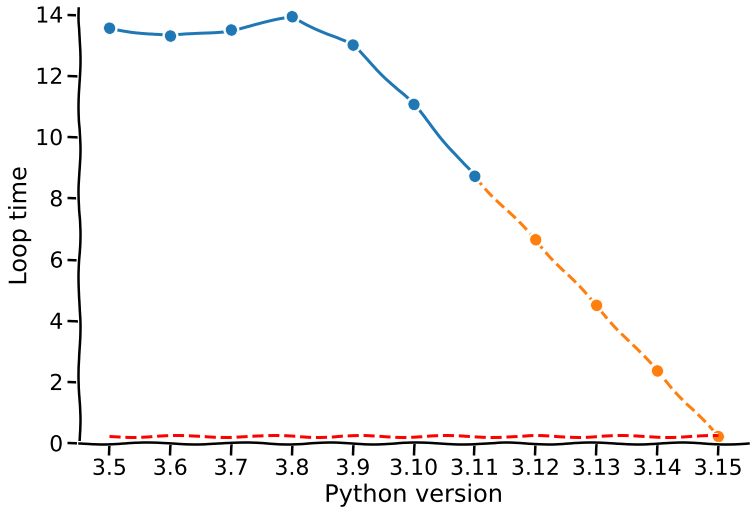

In [155]:
cpp_time = 0.2319

prev_n = 3
x = df.loc[len(df)-prev_n:, 'minor_version']
y = df.loc[len(df)-prev_n:, 'Loop time']

parameters = np.polyfit(x, y, 1)

def polyfit(parameters: list, x: int) -> float:
    return x * parameters[0] + parameters[1]

last_version = df.minor_version.iat[-1]
ith_version = last_version + 1
new_versions, new_times = [], []
while True:
    new_versions.append(ith_version)
    new_times.append(polyfit(parameters, ith_version))
    ith_version += 1
    if new_times[-1] < cpp_time:
        break

new_labels = [str(df.major_version.iat[0]) + '.' + str(x) for x in new_versions]

new_version_df = pd.DataFrame({
    'Python version': new_labels,
    'Loop time': new_times,
})

colors = sns.color_palette("tab10")
fig, ax = plt.subplots(figsize=(12,8))
sns.lineplot(data=df, x='Python version', y='Loop time', marker="o", ax=ax, color=colors[0], zorder=2)
sns.despine()
ax.set_ylim([0,14.2])
# ax.set_xlim([3.7, 3.11])

sns.lineplot(data=new_version_df, x='Python version', y='Loop time', marker="o", ax=ax, color=colors[1], linestyle='--', zorder=2)
ax.plot([df['Python version'].iat[-1], new_labels[0]], [df['Loop time'].iat[-1], new_times[0]], '--', color=colors[1], zorder=1)

# C++ version
ax.plot(['3.5', new_labels[-1]], [0.2319, 0.2319], 'r--')


In [133]:
new_versions

[12, 13, 14, 15]

In [119]:
df.loc[:, 'minor_version']

5    10
6    11
Name: minor_version, dtype: int64

(0.12156862745098039, 0.4666666666666667, 0.7058823529411765)